In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
canada_path = "canada_data.csv"
canada_data = pd.read_csv(canada_path)
#canada_data

In [5]:
#canada count test chunk (does not reflect all revisions)
#canada_rev3.count()

In [6]:
#drop blank columns
canada_rev1 = canada_data.drop(["SYMBOL", "TERMINATED"], axis=1)
#drop "duplicate" or not useful info
canada_rev2 = canada_rev1.drop(["DGUID", "SCALAR_ID", "UOM_ID", "REF_DATE", "DECIMALS"], axis=1) #STATUS column's purpose unknown at this point
#setting COORDINATE to index
canada_rev3 = canada_rev2.set_index("COORDINATE")
#extra for viewing
canada_rev4 = canada_rev3.copy()

In [7]:
#fill missing values in VALUE and STATUS (while STATUS still exists)
canada_rev4["VALUE"] = canada_rev4["VALUE"].fillna("N/A")
#canada_rev4["STATUS"] = canada_rev4["STATUS"].fillna("N/A") #this one looks stupid on further examination

In [8]:
#making csv to view in excel
#canada_rev3.to_csv("canada_project/data/canada_rev3.csv", index=True, header=True)
#canada_rev4.to_csv("canada_project/data/canada_rev4.csv", index=True, header=True)

In [9]:
#sort into two different dfs: one for percents values and one for raw numbers
canada_percent = canada_rev3[canada_rev3["UOM"] != "Persons"]
canada_persons = canada_rev3[canada_rev3["UOM"] != "Percent"]

In [10]:
#something to play around with; I think it may be useful in early parts of the report; feel free to delete which would be less useful
canada_persons_total = canada_persons[canada_persons["Response"] == "Total, job satisfaction"]
canada_percent_total = canada_percent[canada_percent["Response"] == "Total, job satisfaction"]
canada_persons_total

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.1.1.1.1,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319003,15167.0,NaN
1.1.2.1.1,Canada,"Total, 15 years and over",Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319031,7889.0,NaN
1.1.3.1.1,Canada,"Total, 15 years and over",Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116319059,7278.0,NaN
1.2.1.1.1,Canada,15 to 24 years,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319087,2000.0,NaN
1.2.2.1.1,Canada,15 to 24 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319115,982.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6.9.2.1.1,British Columbia,65 to 74 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116759169,24.0,E
6.9.3.1.1,British Columbia,65 to 74 years,Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116759205,26.0,E
6.10.1.1.1,British Columbia,75 years and over,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116759241,NaN,F


In [11]:
provinces = canada_rev3[(canada_rev3["GEO"] != "Canada") & (canada_rev3["GEO"] != "Atlantic provinces") & 
                        (canada_rev3["GEO"] != "Prairie provinces")]
#one graphic should be the population distribution of responses; I have an idea but its late so I shouldn't go further 

In [12]:
#canada_persons_no_f = canada_percent = canada_rev3[canada_rev3["STATUS"] != "F"]
#canada_persons_no_f["GEO"].value_counts()
#this is just extra stuff

In [13]:
#setting up for question 4 i guess
provinces_percent = provinces[provinces["Estimates"] == "Percentage of persons"]
pro_per_2 = provinces_percent[(provinces_percent["Sex"] == "Both sexes") & 
                              (provinces_percent["Response"] != "Total, job satisfaction") &
                             (provinces_percent["Age group"] == "Total, 15 years and over")]
pro_per_3 = pro_per_2[(pro_per_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_per_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_per_2["Response"] == "Dissatisfied or very dissatisfied")]
#setting up for question 4 i guess (but persons)
provinces_people = provinces[provinces["Estimates"] == "Number of persons"]
pro_ple_2 = provinces_people[(provinces_people["Sex"] == "Both sexes") & 
                              (provinces_people["Response"] != "Total, job satisfaction") &
                             (provinces_people["Age group"] == "Total, 15 years and over")]
pro_ple_3 = pro_ple_2[(pro_ple_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_ple_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_ple_2["Response"] == "Dissatisfied or very dissatisfied")]
#omitted the "don't know" rows as there are a significant portion with no value" 
pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
#pro_per_3
#omitted the "don't know" rows as there are a significant portion with no value (but persons)
pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)
#pro_ple_3

/var/folders/w0/r9fq24_97m9cpykwdrxs78hr0000gn/T/ipykernel_49949/852431041.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
/var/folders/w0/r9fq24_97m9cpykwdrxs78hr0000gn/T/ipykernel_49949/852431041.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)


In [18]:
#pro_per_3.to_csv("canada_project/data/province_percent.csv", index=True, header=True)
#pro_ple_3.to_csv("canada_project/data/province_people.csv", index=True, header=True)

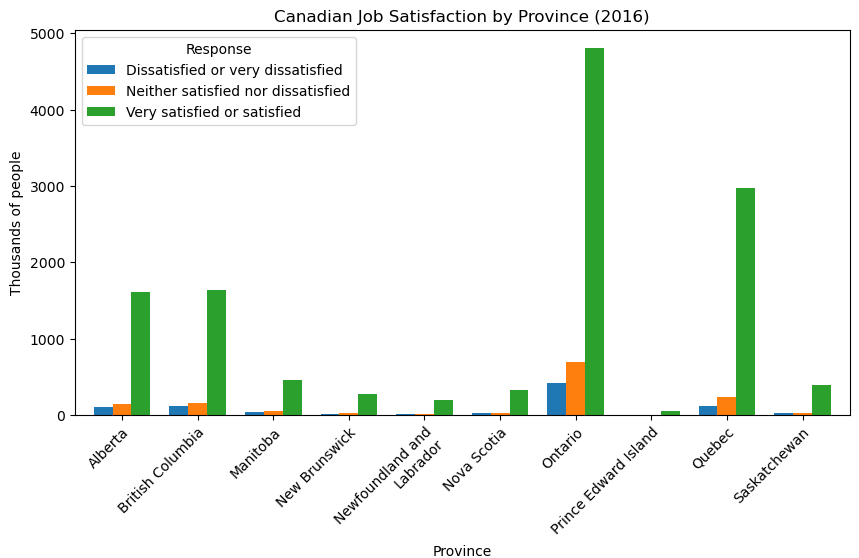

In [19]:
pro_ple_plot1 = pro_ple_3.pivot(index="GEO", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Province (2016)",
                                     xlabel="Province", ylabel="Thousands of people",
                                     width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()

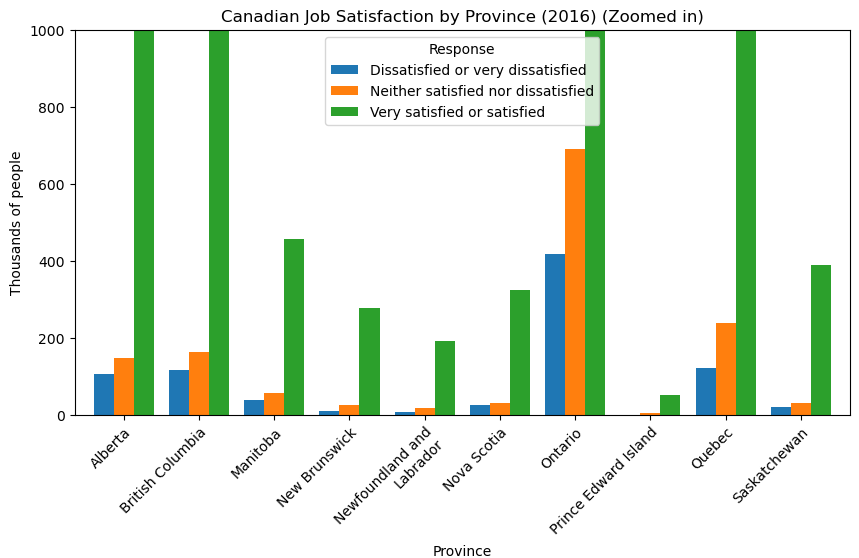

In [20]:
pro_ple_plot2 = pro_ple_3.pivot(index="GEO", columns="Response", 
                                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Province (2016) (Zoomed in)",xlabel="Province", ylabel="Thousands of people",
                                                     width=0.8, ylim=[0,1000])
plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()

In [16]:
#AGE GROUPS

In [17]:
canada_rev3

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.1.1.1.1,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319003,15167.0,NaN
1.1.1.1.2,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Percentage of persons,Percent,units,v116319004,100.0,NaN
1.1.1.1.3,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","Low 95% confidence interval, percent",Percent,units,v116319005,100.0,NaN
1.1.1.1.4,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","High 95% confidence interval, percent",Percent,units,v116319006,100.0,NaN
1.1.1.8.1,Canada,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747325,12730.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6.10.3.6.4,British Columbia,75 years and over,Female,Very dissatisfied,"High 95% confidence interval, percent",Percent,units,v116759344,NaN,F
6.10.3.7.1,British Columbia,75 years and over,Female,Don't know/refusal/not stated,Number of persons,Persons,thousands,v116759345,NaN,F
6.10.3.7.2,British Columbia,75 years and over,Female,Don't know/refusal/not stated,Percentage of persons,Percent,units,v116759346,NaN,F


In [22]:
Canada_GEO = canada_rev3[canada_rev3["GEO"] == "Canada"]


In [35]:
Agegroup_percent = Canada_GEO[Canada_GEO["Estimates"] == "Percentage of persons"]

age_per_2 = Agegroup_percent[(Agegroup_percent["Sex"] == "Both sexes") & 
                              (Agegroup_percent["Response"] != "Total, job satisfaction") &
                             (Agegroup_percent["Age group"] == "Total, 15 years and over")]
age_per_3 = age_per_2[(age_per_2["Response"] == "Very satisfied or satisfied") | 
                      (age_per_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (age_per_2["Response"] == "Dissatisfied or very dissatisfied")]
#setting up for question 4 i guess (but persons)
#provinces_people = provinces[provinces["Estimates"] == "Number of persons"]
#pro_ple_2 = provinces_people[(provinces_people["Sex"] == "Both sexes") & 
                           #   (provinces_people["Response"] != "Total, job satisfaction") &
                           #  (provinces_people["Age group"] == "Total, 15 years and over")]
#pro_ple_3 = pro_ple_2[(pro_ple_2["Response"] == "Very satisfied or satisfied") | 
                    #  (pro_ple_2["Response"] == "Neither satisfied nor dissatisfied") |
                   #  (pro_ple_2["Response"] == "Dissatisfied or very dissatisfied")]
#omitted the "don't know" rows as there are a significant portion with no value" 
age_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
#pro_per_3
#omitted the "don't know" rows as there are a significant portion with no value (but persons)
#pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)
#pro_ple_3

/var/folders/w0/r9fq24_97m9cpykwdrxs78hr0000gn/T/ipykernel_49949/2025821932.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)


In [82]:
Agegroup_persons = Canada_GEO[Canada_GEO["UOM"] == "Persons"]

new = Agegroup_persons[(Agegroup_persons["Sex"] == "Both sexes") & 
                (Agegroup_persons["Response"] != "Total, job satisfaction") &
                (Agegroup_persons["Response"] != "Satisfied") &
                (Agegroup_persons["Response"] != "Very satisfied") &
                (Agegroup_persons["Response"] != "Don't know/refusal/not stated") &
                (Agegroup_persons["Response"] != "Dissatisfied") &
                (Agegroup_persons["Age group"] != "Total, 15 years and over") &
                (Agegroup_persons["Response"] != "Very dissatisfied") &
                (Agegroup_persons["Age group"] != "25 to 54 years") & 
                (Agegroup_persons["Age group"] != "65 years and over")]

In [83]:
new

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.2.1.8.1,Canada,15 to 24 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747349,1557.0,NaN
1.2.1.4.1,Canada,15 to 24 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319099,297.0,NaN
1.2.1.9.1,Canada,15 to 24 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747353,123.0,E
1.6.1.8.1,Canada,25 to 34 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747485,2951.0,NaN
1.6.1.4.1,Canada,25 to 34 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116747497,400.0,NaN
1.6.1.9.1,Canada,25 to 34 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747501,239.0,NaN
1.3.1.8.1,Canada,35 to 44 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747589,2914.0,NaN
1.3.1.4.1,Canada,35 to 44 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319183,263.0,NaN
1.3.1.9.1,Canada,35 to 44 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747593,196.0,NaN


In [62]:
new["VALUE"] = new["VALUE"].fillna(0)

/var/folders/w0/r9fq24_97m9cpykwdrxs78hr0000gn/T/ipykernel_49949/3348154856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["VALUE"] = new["VALUE"].fillna(0)


In [63]:
new

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.2.1.8.1,Canada,15 to 24 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747349,1557.0,NaN
1.2.1.4.1,Canada,15 to 24 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319099,297.0,NaN
1.2.1.9.1,Canada,15 to 24 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747353,123.0,E
1.6.1.8.1,Canada,25 to 34 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747485,2951.0,NaN
1.6.1.4.1,Canada,25 to 34 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116747497,400.0,NaN
1.6.1.9.1,Canada,25 to 34 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747501,239.0,NaN
1.3.1.8.1,Canada,35 to 44 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747589,2914.0,NaN
1.3.1.4.1,Canada,35 to 44 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319183,263.0,NaN
1.3.1.9.1,Canada,35 to 44 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747593,196.0,NaN


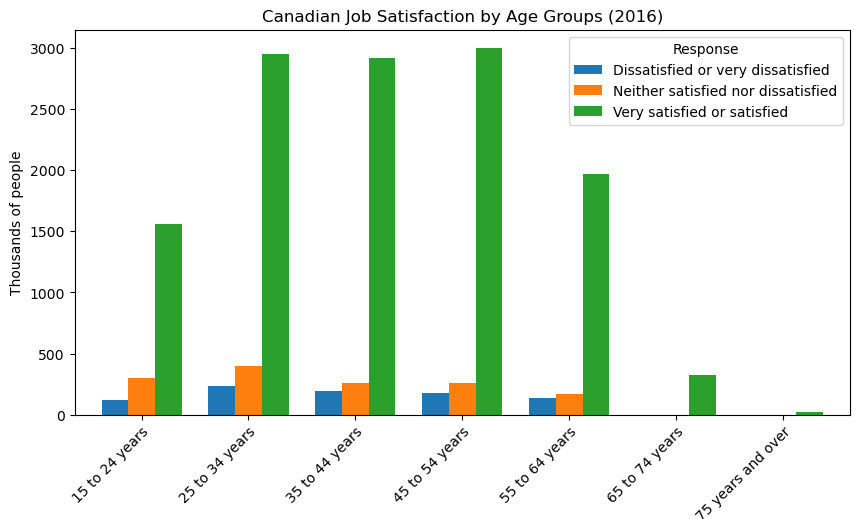

In [67]:
Age_ple_plot1 = new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()

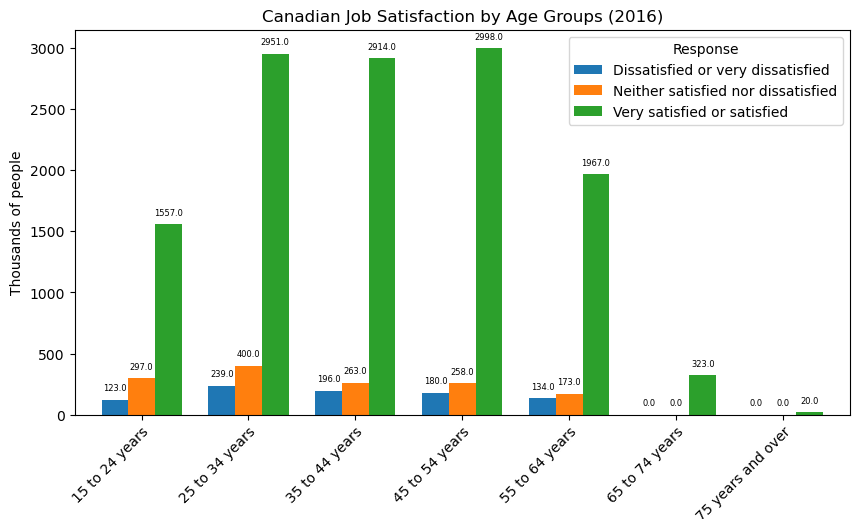

In [84]:
Age_ple_plot1 = new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)

# Add number labels to the top of each bar
for container in Age_ple_plot1.containers:
    for bar in container:
        height = bar.get_height()
        Age_ple_plot1.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width() / 2, height),
                               ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                               fontsize=6)  # Adjust the fontsize as desired

plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()

In [91]:
Female_Agegroup_persons = Canada_GEO[Canada_GEO["UOM"] == "Persons"]

female_new = Agegroup_persons[(Agegroup_persons["Sex"] == "Female") & 
                (Agegroup_persons["Response"] != "Total, job satisfaction") &
                (Agegroup_persons["Response"] != "Satisfied") &
                (Agegroup_persons["Response"] != "Very satisfied") &
                (Agegroup_persons["Response"] != "Don't know/refusal/not stated") &
                (Agegroup_persons["Response"] != "Dissatisfied") &
                (Agegroup_persons["Age group"] != "Total, 15 years and over") &
                (Agegroup_persons["Response"] != "Very dissatisfied") &
                (Agegroup_persons["Age group"] != "25 to 54 years") &
               (Agegroup_persons["Age group"] != "65 years and over")]

In [92]:
female_new

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.2.3.8.1,Canada,15 to 24 years,Female,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747365,810.0,NaN
1.2.3.4.1,Canada,15 to 24 years,Female,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319155,141.0,E
1.2.3.9.1,Canada,15 to 24 years,Female,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747369,53.0,E
1.6.3.8.1,Canada,25 to 34 years,Female,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747557,1420.0,NaN
1.6.3.4.1,Canada,25 to 34 years,Female,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116747569,151.0,NaN
1.6.3.9.1,Canada,25 to 34 years,Female,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747573,120.0,E
1.3.3.8.1,Canada,35 to 44 years,Female,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747605,1403.0,NaN
1.3.3.4.1,Canada,35 to 44 years,Female,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319239,135.0,NaN
1.3.3.9.1,Canada,35 to 44 years,Female,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747609,82.0,NaN


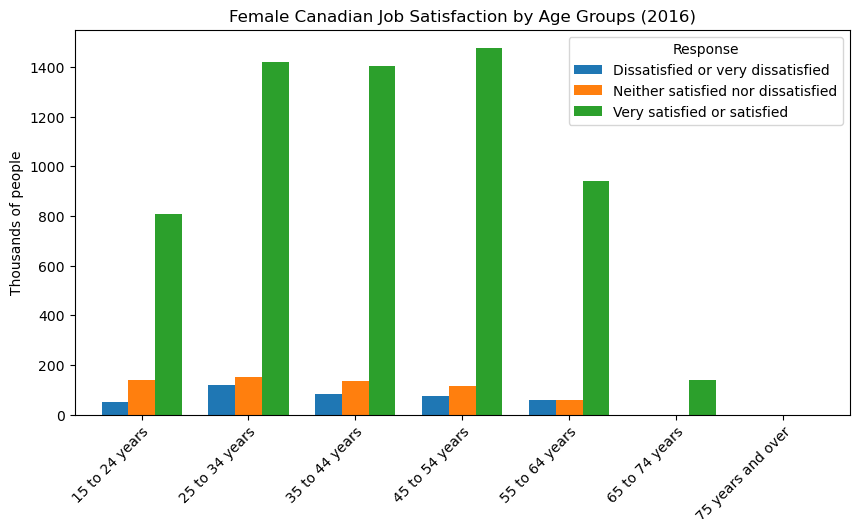

In [96]:
Female_Age_plot1 = female_new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Female Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)


plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()

In [97]:
male_Agegroup_persons = Canada_GEO[Canada_GEO["UOM"] == "Persons"]

male_new = Agegroup_persons[(Agegroup_persons["Sex"] == "Male") & 
                (Agegroup_persons["Response"] != "Total, job satisfaction") &
                (Agegroup_persons["Response"] != "Satisfied") &
                (Agegroup_persons["Response"] != "Very satisfied") &
                (Agegroup_persons["Response"] != "Don't know/refusal/not stated") &
                (Agegroup_persons["Response"] != "Dissatisfied") &
                (Agegroup_persons["Age group"] != "Total, 15 years and over") &
                (Agegroup_persons["Response"] != "Very dissatisfied") &
                (Agegroup_persons["Age group"] != "25 to 54 years") &
               (Agegroup_persons["Age group"] != "65 years and over")]

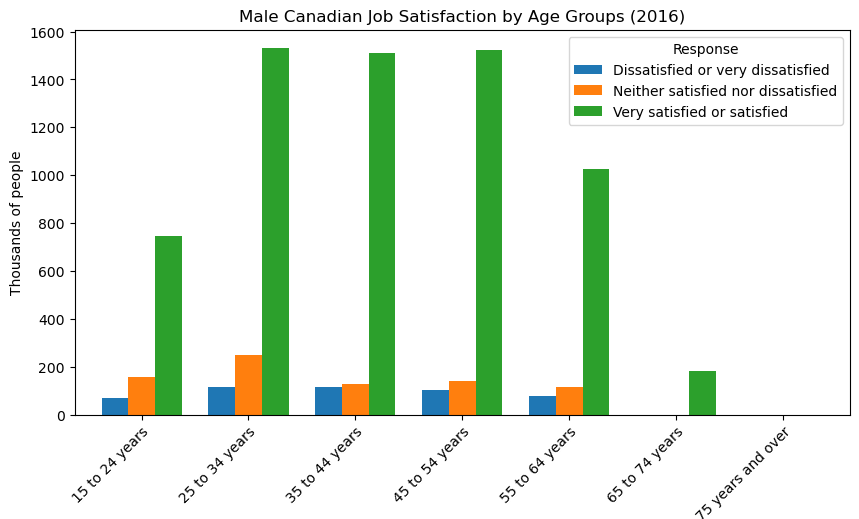

In [99]:
male_Age_plot1 = male_new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Male Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)

# Add number labels to the top of each bar
for container in Age_ple_plot1.containers:
    for bar in container:
        height = bar.get_height()
        Age_ple_plot1.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width() / 2, height),
                               ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                               fontsize=6)  # Adjust the fontsize as desired

plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()